In [1]:
import pandas as pd
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/node_anno_df')

In [2]:
gold_anno.head()

,pathway,GO,nr,cluster,card,domain,hypo_nr
representing_gene,,,,,,,
562.23904.con.0022_83|562.23904,NaN,NaN,WP_089563092.1 type I secretion C-terminal tar...,Cluster 0,NaN,"{IPR019960, IPR022038, IPR011049, IPR013783}",False
562.23017.con.0015_5|562.23017,NaN,NaN,AEQ11302.1 adhesin for cattle intestine coloni...,Cluster 1,NaN,"{IPR022038, IPR013783}",False
562.22834.con.0008_97|562.22834,NaN,{GO:0007155},WP_106901749.1 hypothetical protein [Escherich...,Cluster 2,NaN,"{IPR018392, IPR013783, IPR003535, IPR003344, I...",True
562.22653.con.0011_41|562.22653,NaN,{GO:0005515},WP_078207493.1 DUF1983 domain-containing prote...,Cluster 3,NaN,"{IPR036116, IPR013783, IPR003961, IPR015406, I...",False
562.23583.con.0086_1|562.23583,NaN,NaN,WP_097495638.1 tandem-95 repeat protein [Esche...,Cluster 4,NaN,"{IPR025592, IPR039005}",False


In [3]:
gold_anno.count()

pathway     3012
GO         10212
nr         30740
cluster    31749
card         102
domain     18579
hypo_nr    30740
dtype: int64

In [4]:
gold_anno[['pathway', 'GO', 'nr', 'domain']].dropna().shape # 2375 has all the annotations

(2375, 4)

In [5]:
gold_anno[['pathway', 'GO', 'domain']].dropna(how = 'all').index # 18579 has at least one information

Index(['562.23904.con.0022_83|562.23904', '562.23017.con.0015_5|562.23017',
       '562.22834.con.0008_97|562.22834', '562.22653.con.0011_41|562.22653',
       '562.23583.con.0086_1|562.23583', '562.23913.con.0001_28|562.23913',
       '562.22704.con.0005_169|562.22704', '562.22907.con.0015_9|562.22907',
       '562.22793.con.0028_9|562.22793', '562.23206.con.0027_33|562.23206',
       ...
       '562.23713.con.0059_8|562.23713', 'JMUY01000001_181|1438670.3',
       '562.22668.con.0093_1|562.22668', '562.22442.con.0066_6|562.22442',
       'JAPE01000016_88|1400157.3', 'FLWH01000013_80|562.12962',
       '562.23488.con.0031_40|562.23488', '562.23583.con.0149_1|562.23583',
       '562.23303.con.0033_1|562.23303', '562.22636.con.0079_3|562.22636'],
      dtype='object', name='representing_gene', length=18579)

In [24]:

def count_term(df, term):
    total_list = []
    for i in df[term]:
        if type(i) != float: # do not count nan
            total_list += list(i)
    counting = pd.Series(total_list)
    return(counting)

In [25]:
GO_count = count_term(gold_anno, 'GO')

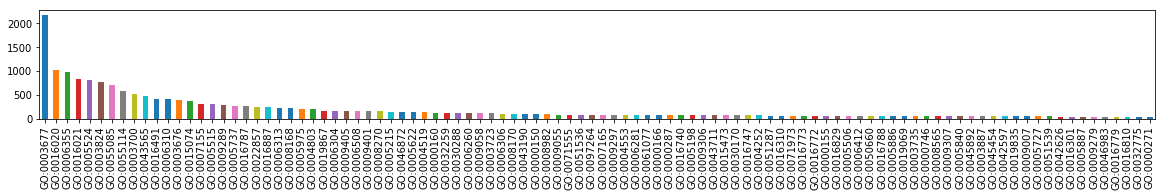

In [26]:
%matplotlib inline
GO_count.value_counts()[:100].plot(kind = 'bar', figsize = (20,2))

In [36]:
GO_count.value_counts()[:10]
# DNA binding
# membrane 
# regulation of transcription, DNA-templated
# integral component of membrane
# ATP binding
# catalytic activity
# transmembrane transport 
# oxidation-reduction process
# DNA-binding transcription factor activity 
# sequence-specific DNA binding 

GO:0003677    2160
GO:0016020    1023
GO:0006355     983
GO:0016021     838
GO:0005524     805
GO:0003824     763
GO:0055085     694
GO:0055114     567
GO:0003700     522
GO:0043565     480
dtype: int64

In [29]:
pa_count = count_term(gold_anno, 'pathway')

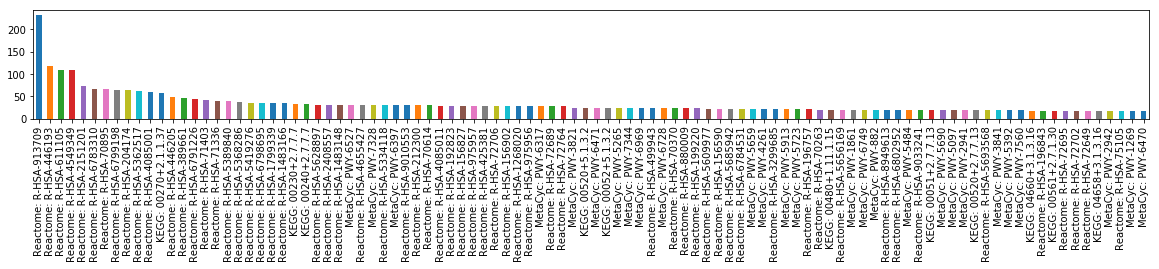

In [30]:
pa_count.value_counts()[:100].plot(kind = 'bar', figsize = (20,2))

In [31]:
pa_count.value_counts()[:5] 
# O-linked glycosylation of mucins R-HSA-913709
# Biosynthesis of the N-glycan precursor
# Respiratory electron transport
# Defective ALG2 causes ALG2-CDG (CDG-1i) 
# Transcriptional activation of mitochondrial biogenesis

Reactome: R-HSA-913709     231
Reactome: R-HSA-446193     117
Reactome: R-HSA-611105     108
Reactome: R-HSA-4549349    108
Reactome: R-HSA-2151201     73
dtype: int64

In [32]:
da_count = count_term(gold_anno, 'domain')

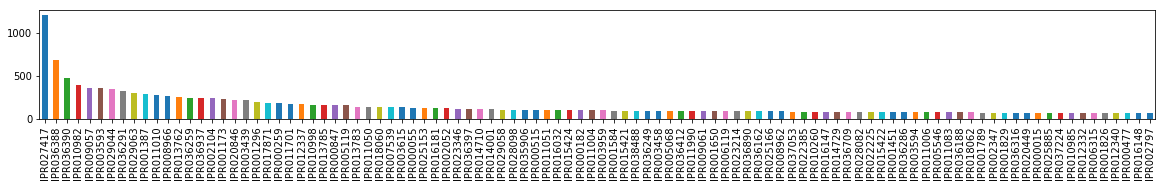

In [34]:
da_count.value_counts()[:100].plot(kind = 'bar', figsize = (20,2))

In [35]:
da_count.value_counts()[:5]
# P-loop containing nucleoside triphosphate hydrolase
# Winged helix-like DNA-binding domain superfamily 
# Winged helix DNA-binding domain superfamily 
# Lambda repressor-like, DNA-binding domain superfamily
# Homeobox-like domain superfamily 

IPR027417    1199
IPR036388     685
IPR036390     479
IPR010982     391
IPR009057     357
dtype: int64

In [2]:
from Genome.goldstandard_pair.parse_interpro_out import *

In [3]:
#gold = gold_anno[['pathway', 'GO', 'nr', 'domain']].dropna().sample(n=200)# sample from the ones with all the annotation
#gold.to_pickle('/home/hermuba/data0118/bench_set/sampled_gold_200')
gold = pd.read_pickle('/home/hermuba/data0118/bench_set/sampled_gold_200')

In [4]:
n1, n2, g_gold = gold_standard(gold, 'GO') # I removed the most popular GO term

In [5]:
gold_itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'GO_inter':g_gold})

In [6]:
gold_itxn['GO_inter'].sum() # 1760/19900 = true;

1760

In [8]:
n1, n2, p_gold = gold_standard(gold, 'pathway') # I removed the most popular GO term

In [9]:
itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'path_inter':p_gold})

In [12]:
gold_itxn = gold_itxn.merge(itxn, on = ['gene1', 'gene2'])

In [14]:
n1, n2, d_gold = gold_standard(gold, 'domain')
itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'domain_inter':d_gold})
gold_itxn = gold_itxn.merge(itxn, on = ['gene1', 'gene2'])

In [15]:
gold_itxn.sum()

GO_inter                                                     1760
gene1           562.23361.con.0005_69|562.23361562.23361.con.0...
gene2           FLWH01000009_32|562.12962JMUY01000001_191|1438...
path_inter                                                    251
domain_inter                                                  339
dtype: object

In [16]:
gold_itxn.to_pickle('/home/hermuba/data0118/bench_set/sampled_200_itxn')